<a href="https://colab.research.google.com/github/casten/CovidGraphs/blob/master/CovidGraphs_USCounties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#utils

In [8]:
import numpy as np
import pandas as pd

# Gets top 10 counties by final case count
def getTopTenCountiesBySize(data, key):
  end_date = pd.to_datetime(data['date']).max()
  latest_numbers = data[pd.to_datetime(data['date']) == end_date]
  byCases = latest_numbers.sort_values(key, ascending=False)
  return byCases[0:10]


Load data for NYT github site, merge county + state data, remove unneeded cols, cleanup

In [9]:

dfAllCounties = pd.read_csv("https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv?raw=true") #, nrows=1000)
dfAllCounties.drop(columns=['fips'])
dfAllCounties.drop(columns=['deaths'])
for i, row in dfAllCounties.iterrows():
    dfAllCounties.at[i,'county'] = dfAllCounties.at[i,'county']+',  '+dfAllCounties.at[i,'state']
dfAllCounties.drop(columns=['state'])

counties = pd.unique(dfAllCounties['county'])
print(f'Number of US Counties: {len(counties)}')

Number of US Counties: 3076


#All US Counties by Case Count
(no labels)

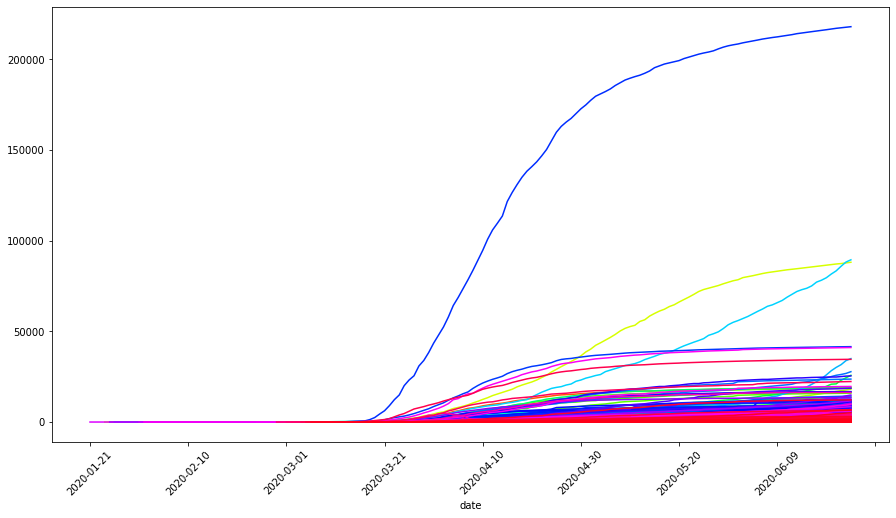

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

piv2 = dfAllCounties.pivot(index='date' , columns='county', values='cases')
ax = piv2.plot(figsize=(15,8), colormap='hsv', legend=False, rot=45)


----------------
Limit to top 10 by final case count

In [11]:
topTen = getTopTenCountiesBySize(dfAllCounties, 'cases')

dfTopTenCounties = dfAllCounties[dfAllCounties['county'].isin(topTen['county'])]

dfTopTenCounties.index = pd.to_datetime(dfTopTenCounties['date'])
dfTopTenCounties.drop(columns=['date'])
piv = dfTopTenCounties.pivot(index='date' , columns='county', values='cases')

# Top Ten Counties by Total Case Count
since 1/24

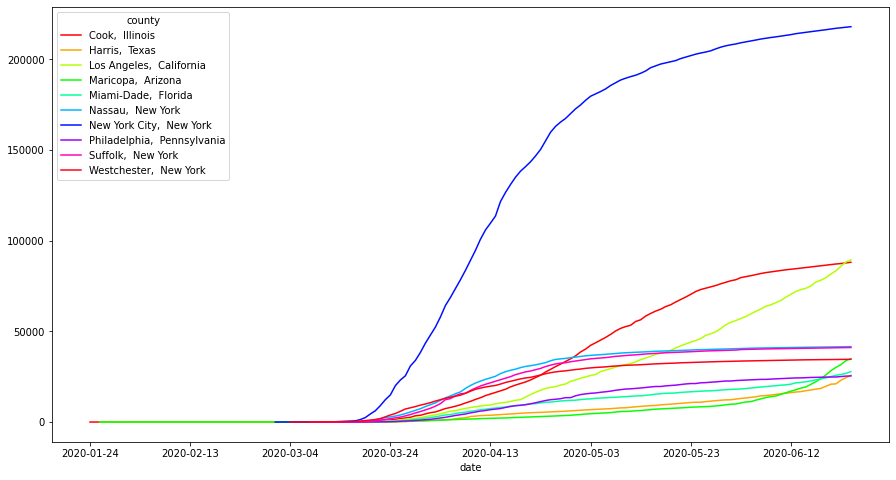

In [12]:
axes = piv.plot(figsize=(15,8), colormap='hsv')

# Total Case Counts from May 1 onward

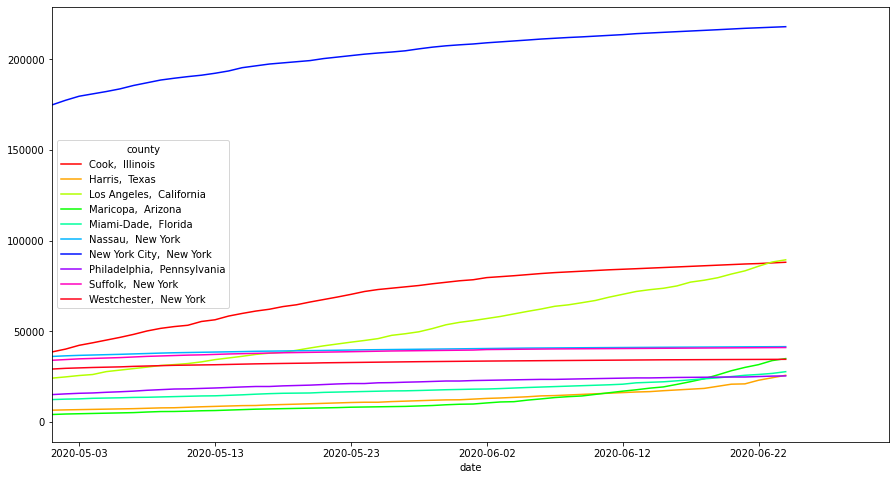

In [13]:
piv.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), colormap='hsv')

# Rates averaged over 7 day period May 1 Onward
0 means no new cases (the absolute best case)
Higher numbers mean larger weekly rates.

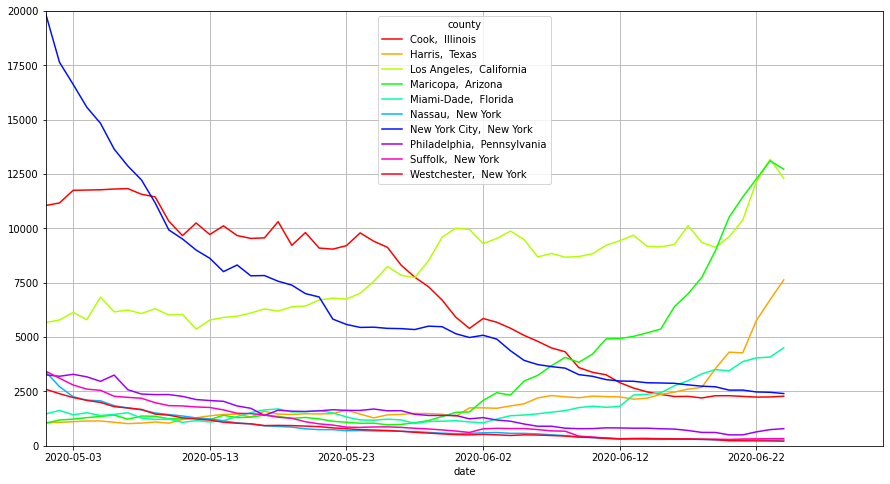

In [14]:
diff = piv.diff(periods=7)
diff.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), ylim = (0,20000), grid=True, colormap='hsv')

# Changes in Rate Over 7 Days May 1 Onward
Positive numbers indicate lack of control.  Negative indicate things are getting better. 

Note that 0 means no change in rate.  

This graph is showing who is improving their rate and not how well they are doing overall.

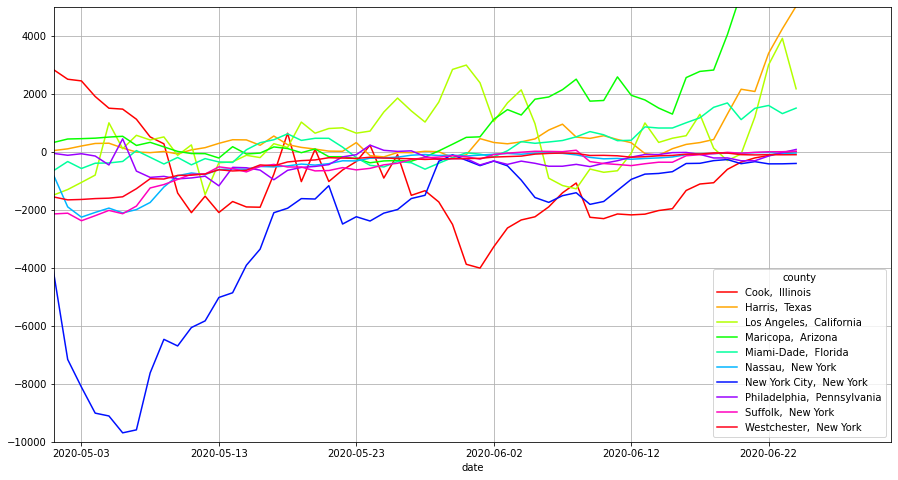

In [15]:
diff2 = diff.diff(periods=7)
diff2.plot(figsize=(15,8),xlim=piv.index.get_loc('2020-05-01'), ylim=(-10000,5000), grid=True, colormap='hsv')